In [29]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

In [2]:
raw_data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')

In [3]:
raw_data.info()
df = raw_data
raw_data.index = pd.to_datetime(raw_data.date + ' ' + raw_data.time)

resamled = raw_data.open.resample('1H').first()
resamled.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390552 entries, 0 to 390551
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    390552 non-null  object 
 1   time    390552 non-null  object 
 2   open    390552 non-null  float64
 3   high    390552 non-null  float64
 4   low     390552 non-null  float64
 5   close   390552 non-null  float64
dtypes: float64(4), object(2)
memory usage: 17.9+ MB


In [86]:
"""
Source: https://mingze-gao.com/measures/lomackinlay1988/
"""
def variance_ratio_test(log_prices, time_lag):
    rets = np.diff(log_prices)
    T = len(rets)
    mean_log_ret = np.mean(rets)
    sqr_subtraction = np.square(rets - mean_log_ret)
    Var_1 = np.sum(sqr_subtraction) / (T-1)
    rets_q_lag = (log_prices - np.roll(log_prices, time_lag))[time_lag:]
    m_const= time_lag * (T - time_lag + 1) * (1 - time_lag / T)
    Var_k = 1 / m_const * np.sum(np.square(rets_q_lag - time_lag * mean_log_ret))
    VR = Var_k /Var_1
    a_array = np.array([round((2*(time_lag - i) / time_lag) ** 2, 4) for i in range(1, time_lag)])
    b_arr = np.empty(time_lag - 1, dtype=np.float64)
    for j in range(1, time_lag):
        b_arr[j - 1] = np.sum((sqr_subtraction * np.roll(sqr_subtraction, j))[j+1:])
    delta_array = T * b_arr / np.square(np.sum(sqr_subtraction))
    #assert len(delta_array) == len(a_array) == time_lag - 1
    phi1 = 2 * (2 * time_lag - 1) * (time_lag - 1) / (3 * time_lag * T)
    phi2 = np.sum(a_array * delta_array) / T

    VR_STAT_HOMO = (VR - 1) / np.sqrt(phi1)
    VR_STAT_HETERO = (VR - 1) / np.sqrt(phi2)
    return VR, VR_STAT_HOMO, VR_STAT_HETERO

def estimator(input_data):
    for time_lag in [5, 6, 8, 10, 15, 20, 30, 40, 50]:
        vr, homo, hetero = variance_ratio_test(np.log(input_data), time_lag)
        print(f"Variance Ration for time_lag={time_lag}: {vr} \n HOMO: {homo}, p_value = {stats.norm.cdf(homo)} \n HETERO: {hetero}, p_value = {stats.norm.cdf(hetero)} \n--------")

In [54]:
working = resamled.dropna().values

array([1215.875, 1215.875, 1209.875, ..., 2055.25 , 2069.875, 2072.625])

In [89]:
for batch_size in [300, 600, 800, 1200, 2000, 5000, 7000]:
    print('==================')
    print('SIZE IS:', batch_size)
    estimator(np.log(working[:batch_size]))
    print('=====================')

SIZE IS: 300
Variance Ration for time_lag=5: 0.9268041842761074 
 HOMO: -0.5776984876080697, p_value = 0.28173385021059083 
 HETERO: -0.7319170199518807, p_value = 0.2321096085824581 
--------
Variance Ration for time_lag=6: 0.8934804342904803 
 HOMO: -0.7450834060967471, p_value = 0.22811064997816594 
 HETERO: -0.9338925814766251, p_value = 0.17517965297571658 
--------
Variance Ration for time_lag=8: 0.7316676340769268 
 HOMO: -1.5685726112601441, p_value = 0.058373779232643544 
 HETERO: -1.9160923489926898, p_value = 0.02767667100150867 
--------
Variance Ration for time_lag=10: 0.6141697732519136 
 HOMO: -1.9759657687094507, p_value = 0.024079327165239105 
 HETERO: -2.330538587492898, p_value = 0.00988885151209006 
--------
Variance Ration for time_lag=15: 0.5387202644803738 
 HOMO: -1.8777086739217432, p_value = 0.030210514737337574 
 HETERO: -2.138903481070187, p_value = 0.016221743036807876 
--------
Variance Ration for time_lag=20: 0.532135530075962 
 HOMO: -1.6278230103905036,

array([1215.875, 1215.875, 1209.875, ..., 2055.25 , 2069.875, 2072.625])

PDF 0.15865525393145707 CDF 0.8413447460685429 
 SUM: 1.0


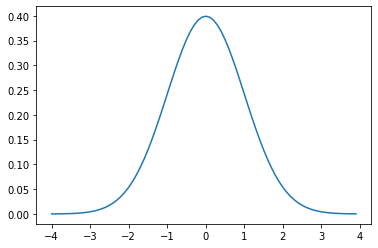

In [75]:
def _worker(x):
    return stats.norm.pdf(x)
X = np.arange(-4,4,0.1)
_worker(X)
plt.plot(X, _worker(X))
print(f'PDF {stats.norm.sf(1)} CDF {stats.norm.cdf(1)} \n SUM: {stats.norm.sf(1) + stats.norm.cdf(1)}')

array([7.10321926, 7.10321926, 7.09827233, ..., 7.62815277, 7.6352435 ,
       7.6365712 ])